In [1]:
# NO CODE

from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np
from scipy import stats

## Sampling Without Replacement ##

The draws in a simple random sample aren't independent of each other. This makes calculating variances a little less straightforward than in the case of draws with replacement.

In this section we will find the variance of a random variable that has a hypergeometric distribution. Then we will use the variance to examine the accuracy of polls.

As a preliminary, let's do some calculations involving indicator random variables.

### Squares and Products of Indicators ##

Let $I_A$ be the indicator of the event $A$. Then the distribution of $I_A$ is given by

|value|$0$|$1$|
|----:|:---:|:---:|
|**probability**|$1-P(A)$|$P(A)$|

We know that $E(I_A) = P(A)$.

Now let's look at the random variable $I_A^2$. As we have seen before, this is a function of $I_A$ that is in fact equal to $I_A$: when $I_A = 0$ then $I_A^2 = 0$ and when $I_A = 1$ then $I_A^2 = 1$.

So $I_A^2 = I_A$ and hence $E(I_A^2) = P(A)$.

Now let $I_B$ be the indicator of the event $B$, and consider the product $I_AI_B$.

This product is itself an indicator. It has the value 1 when both A and B occur, and it is 0 otherwise. In other words, it is the indcator of the event $AB$.

Therefore $E(I_AI_B) ~ = ~ P(AB)$.

The expectation of the product of two indicators is the probability that both the events being indicated occur.

### SD of the Hypergeometric ###

Let $X$ have the hypergeometric $(N, G, n)$ distribution. That is, let $X$ be the number of good elements in a simple random sample of size $n$ drawn from a population of $N$ elements of which $G$ are good.

As we have seen before, 

$$
X ~ = ~ I_1 + I_2 + \cdots + I_n
$$

where $I_j$ is the indicator of the event that the $j$th draw is good.

We know that $I_1, I_2, \ldots, I_n$ are identically distributed, and that each has chance $G/N$ of being 1. That was how we showed that

$$
E(X) ~ = ~ n\frac{G}{N}
$$

But we can't just add the variances of the indicators to get the variance of $X$. Unlike the binomial case, these indicators aren't independent.

So let's get back to basics and try to use

$$
Var(X) ~ = ~ E(X^2) - (E(X)^2) ~ = ~ E(X^2) - \big{(} n\frac{G}{N} \big{)}^2
$$

To find $E(X^2)$ note that

$$
X^2 ~ = ~ (I_1 + I_2 + \cdots + I_n)^2 ~ = ~ \sum_{j=1}^n I_j^2 + \mathop{\sum_{j=1}^n \sum_{k=1}^n}_{j \ne k} I_jI_k
$$

So

$$
\begin{align*}
E(X^2) ~ &= ~ E(\sum_{j=1}^n I_j^2) + E(\mathop{\sum_{j=1}^n \sum_{k=1}^n}_{j \ne k} I_jI_k)\\
&=~ \sum_{j=1}^n E(I_j^2) + \mathop{\sum_{j=1}^n \sum_{k=1}^n}_{j \ne k} E(I_jI_k)\\
&=~ nE(I_1^2) + n(n-1)E(I_1I_2)
\end{align*}
$$

by the symmetry of simple random sampling.

Apply our results about indicators to see that

$$
E(X^2) ~ = ~ n \frac{G}{N} + n(n-1)\frac{G}{N}\cdot\frac{G-1}{N-1}
$$

and therefore

$$
Var(X) ~ = ~ n \frac{G}{N} + n(n-1)\frac{G}{N}\cdot\frac{G-1}{N-1} - \big{(} n\frac{G}{N} \big{)}^2
$$

That looks awful but it's actually not so bad. Pull out a common factor:

$$
Var(X) ~ = ~ n\frac{G}{N}\big{(} 1 + (n-1)\frac{G-1}{N-1} - n\frac{G}{N}\big{)}
$$

After a little manipulation this becomes

$$
Var(X) ~ = ~ n\frac{G}{N} \cdot \frac{N-G}{N}\cdot\frac{N-n}{N-1}
$$

The initial part of this formula is the binomial variance $npq$. To see this more clearly, write $B = N-G$ for the number of bad elements. Then

$$
Var(X) ~ = ~ \big{(} n\frac{G}{N} \cdot \frac{B}{N}\big{)}\frac{N-n}{N-1} 
$$

and 

$$
SD(X) ~ = ~ \sqrt{n\frac{G}{N} \cdot \frac{B}{N}}\sqrt{\frac{N-n}{N-1}} ~ = ~ \sqrt{npq} \sqrt{\frac{N-n}{N-1}}
$$

for $p = \frac{G}{N}$.

For example, the number of hearts in a 5-card poker hand is expected to be 

$$
5 \times \frac{13}{52} ~ \approx ~ 1.25
$$

with an SD of

$$
\sqrt{5 \times \frac{13}{52} \times \frac{39}{52}}\sqrt{\frac{52 - 5}{52 - 1}} ~ \approx ~ 0.93
$$

### The Size of the FPC ###

We have shown that the SD of the number of good elements when drawing *without* replacement is the same as though we had been drawing *with* replacement, times the *finite population correction* or fpc given by

$$
\text{fpc} ~ = ~ \sqrt{\frac{N-n}{N-1}}
$$

Since the sample size is typically greater than 1, the fpc is typically less than 1. 

This implies that the hypergeoemtric SD is *less* than the corresponding binomial SD if the draws had been made with replacement.

The figure below shows the histogram of the hypergeometric $(52, 26, 5)$ distribution (the distribution of the number of red cards in a poker hand) and the binomial $(5, 26/52)$ distribution.

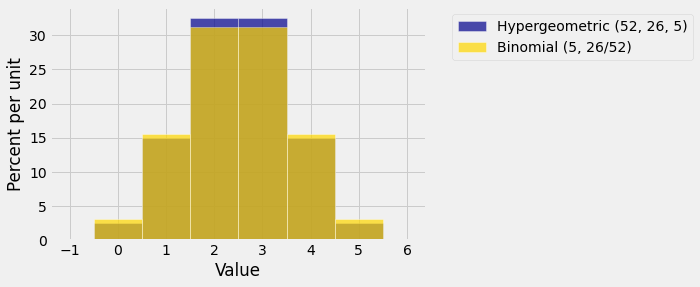

In [2]:
# NO CODE

G = 26
N = 52
n = 5
k = np.arange(n+1)
h = stats.hypergeom.pmf(k, N, G, n)
b = stats.binom.pmf(k, n, G/N)
dist_h = Table().values(k).probabilities(h)
dist_b = Table().values(k).probabilities(b)
Plots('Hypergeometric (52, 26, 5)', dist_h, 'Binomial (5, 26/52)', dist_b)

Both histograms are centered at 2.5. You can see that the hypergeometric histogram is a bit taller and hence a bit less spread out than the binomial.

But not by much! Let's see why.

As we have observed before, sampling with and without replacement are essentially the same when the sample size is small relative to the population size. We now have another confirmation of this.

When the sample size is small relative to the population, the finite population correction is close to 1. That is because 

$$
\frac{N-n}{N-1} ~ = ~ 1 - \frac{n-1}{N-1} ~ \approx ~ 1 - \frac{n}{N} ~ \approx ~ 1
$$

when $\frac{n}{N}$ is small.

The SD of the number of good elements in the sample is the same for sampling with and without replacement, apart from the fpc. When the fpc is close to 1, the two SDs are essentially equal.

Data scientists often have to work with relatively small samples drawn from large populations. We see once more that in such situations they can treat the draws as if they had been made with replacement. 

### The Accuracy of Simple Random Samples ###
When politicans don't like the result of a poll, they sometimes say they don't trust polls that are based on tiny percents of the population. Let's see what we think of that.

Suppose a poll is based on a simple random sample drawn from a huge population of voters of whom a proportion $p$ favor a politician. Then the SD of the number of voters who favor the politician is

$$
\sqrt{npq}\sqrt{\frac{N-n}{N-1}} ~ \approx ~ \sqrt{npq}
$$

because the fpc is close to 1.

Essentially, the SD depends on $p$ and on the *sample* size $n$, not on the population size $N$. The population size appears only in the fpc which is close to 1. In effect, the population size is so large in comparison to the sample size that it might as well be infinite.

Thus if all other things (such as $p$) are equal, a simple random sample of size 100 taken from Berkeley (population about 120,000) is just about as accurate as a simple random sample of size 100 taken from San Francisco (population about 880,000).

As for the doubting politicians, we have to remind them that when the population is large, it's the sample size that matters, not the population size. A a 0.1% sample of one million voters is a small percent of the population but it consists of $n = 1000$ voters. Simple random samples that big are pretty accurate, as we will see in the next section.